**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)

с помощью функции train_test_split так, чтобы размер тестовой выборки

составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
    
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston.data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)


In [8]:
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [9]:
target = boston.target
Y = pd.DataFrame(target, columns=["price"])

In [10]:
Y.head(10)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [17]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

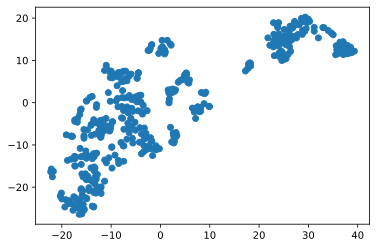

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()


**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,

используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,

и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.




In [19]:
from sklearn.cluster import KMeans

In [20]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [21]:
labels_train = model.fit_predict(X_train_scaled)

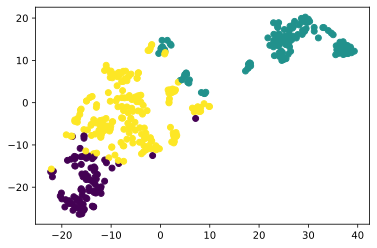

In [22]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [23]:
Y_train[labels_train == 0].mean()
#Первый кластер

price    27.788372
dtype: float64

In [24]:
Y_train[labels_train == 1].mean()
#Второй кластер

price    16.165354
dtype: float64

In [25]:
Y_train[labels_train == 2].mean()
#Третий кластер

price    24.958115
dtype: float64

**Задание 3**

Примените модель KMeans, построенную в предыдущем задании,

к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.





In [26]:
scaler = StandardScaler()

In [27]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [28]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [29]:
labels_test = model.fit_predict(X_test_scaled)

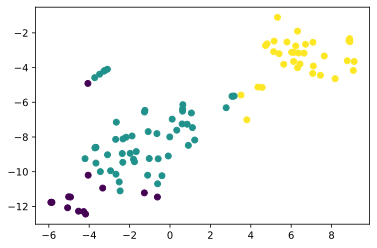

In [30]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [31]:
X_test['CRIM'][labels_test == 0].mean() 
#Первый кластер

0.08618571428571427

In [32]:
X_test['CRIM'][labels_test == 1].mean() 
#Втоорой кластер

0.25200716981132076

In [33]:
X_test['CRIM'][labels_test == 2].mean() 
#Третий кластер

10.165531142857143